# OpenCV Beginner Tutorials Notebook

This is a collection of Python code examples for the requested OpenCV topics. Each section includes a brief explanation, followed by the code in a markdown code block.

In [1]:
import cv2
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

## 1. How to Read, Write, Show Videos from Camera in OpenCV

This example demonstrates capturing video from your camera (webcam), displaying it in a window, and writing (saving) it to a file. Press 'q' to quit.


In [3]:
# Open the default camera (index 0)
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Define the codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for .avi file
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))  # Output file, fps, frame size

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    # Write the frame to the output file
    out.write(frame)
    
    # Display the resulting frame
    cv2.imshow('Camera Feed', frame)
    
    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


## 2. Draw Geometric Shapes on Images using Python OpenCV

This example loads a blank image and draws various shapes like lines, rectangles, circles, and text using OpenCV drawing functions.


In [4]:
# Create a blank black image (height, width, channels)
image = np.zeros((512, 512, 3), np.uint8)

# Draw a line (start point, end point, color (BGR), thickness)
cv2.line(image, (0, 0), (511, 511), (255, 0, 0), 5)  # Blue line

# Draw a rectangle (top-left, bottom-right, color, thickness)
cv2.rectangle(image, (384, 0), (510, 128), (0, 255, 0), 3)  # Green rectangle

# Draw a circle (center, radius, color, thickness; -1 for filled)
cv2.circle(image, (447, 63), 63, (0, 0, 255), -1)  # Red filled circle

# Draw an ellipse (center, axes lengths, angle, start/end angles, color, thickness)
cv2.ellipse(image, (256, 256), (100, 50), 0, 0, 180, (255, 255, 0), -1)  # Cyan half-ellipse

# Draw a polygon (array of points, isClosed, color, thickness)
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], True, (0, 255, 255), 3)  # Yellow polygon

# Add text (text, position, font, scale, color, thickness)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, 'OpenCV Shapes', (10, 500), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image
cv2.imshow('Shapes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 3. Setting Camera Parameters in OpenCV Python

This example shows how to set properties like frame width, height, brightness, and FPS on a camera capture object.


In [ ]:
# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Set camera parameters
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)   # Width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)   # Height
cap.set(cv2.CAP_PROP_FPS, 30)             # Frames per second
cap.set(cv2.CAP_PROP_BRIGHTNESS, 150)     # Brightness (0-255)
cap.set(cv2.CAP_PROP_CONTRAST, 50)        # Contrast (0-255)

# Print current parameters to verify
print("Width:", cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Height:", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS:", cap.get(cv2.CAP_PROP_FPS))
print("Brightness:", cap.get(cv2.CAP_PROP_BRIGHTNESS))
print("Contrast:", cap.get(cv2.CAP_PROP_CONTRAST))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow('Adjusted Camera Feed', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Width: 1280.0
Height: 720.0
FPS: 30.0
Brightness: 0.0
Contrast: 50.0



## 4. Show Date and Time on Videos using OpenCV Python

This example captures video from the camera and overlays the current date and time on each frame using `cv2.putText` and the `datetime` module.


In [ ]:
# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Get current date and time
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Put text on the frame (text, position, font, scale, color, thickness)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, current_time, (10, 50), font, 1, (0, 255, 255), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Video with Date/Time', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 5. Handle Mouse Events in OpenCV

This example sets up a mouse callback to handle events like left-click (draw a circle) and right-click (draw a rectangle) on an image window.


In [ ]:
# Mouse callback function
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Draw a blue circle on left-click
        cv2.circle(img, (x, y), 10, (255, 0, 0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        # Draw a green rectangle on right-click
        cv2.rectangle(img, (x-10, y-10), (x+10, y+10), (0, 255, 0), 2)
    
    # Refresh the display
    cv2.imshow('Image', img)

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

# Display the image
cv2.imshow('Image', img)

# Wait for 'q' to quit
while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## 6. Display Mouse Coordinates

This example displays the current mouse position (x, y coordinates) in the window title as you move the mouse over the image.



In [6]:

# Mouse callback function
def show_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        # Update the window title with coordinates
        cv2.setWindowTitle('Image', f'Coordinates: ({x}, {y})')
        # Display coordinates on the image
        img_copy = img.copy()  # Create a copy to avoid overwriting
        cv2.putText(img_copy, f'({x}, {y})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('Image', img_copy)

# Create a blank image (smaller size: 320x240)
img = np.zeros((240, 320, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', show_coordinates)

# Display the image
cv2.imshow('Image', img)

# Main loop
while True:
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Q key pressed. Exiting...


## 7. Draw Lines with Mouse Drag

This example allows you to draw lines by clicking and dragging the mouse (left button down to start, move to draw, release to finish).


In [3]:

# Global variables
drawing = False  # True if mouse is pressed
ix, iy = -1, -1  # Starting coordinates

# Mouse callback function
def draw_line(event, x, y, flags, param):
    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y  # Record starting point

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            # Draw line from previous point to current
            cv2.line(img, (ix, iy), (x, y), (0, 255, 0), 2)
            ix, iy = x, y  # Update starting point for next segment

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # Complete the line
        cv2.line(img, (ix, iy), (x, y), (0, 255, 0), 2)

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_line)

while True:
    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()



## 8. Crop Image Region with Mouse Selection

This example lets you select a rectangular region by dragging the mouse, then crops and displays the selected area in a new window.


In [7]:

# Global variables
cropping = False
x_start, y_start, x_end, y_end = -1, -1, -1, -1
image_copy = None

# Mouse callback function
def crop_image(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, cropping, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start = x, y
        cropping = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping:
            image_copy = img.copy()
            cv2.rectangle(image_copy, (x_start, y_start), (x, y), (0, 255, 0), 2)
            cv2.imshow('Image', image_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        x_end, y_end = x, y
        cropping = False
        # Draw final rectangle
        cv2.rectangle(img, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
        cv2.imshow('Image', img)

        # Crop the region if valid
        if x_start != x_end and y_start != y_end:
            cropped = img[min(y_start, y_end):max(y_start, y_end), min(x_start, x_end):max(x_start, x_end)]
            cv2.imshow('Cropped Region', cropped)

# Load an image and resize to smaller size (320x240)
img = cv2.imread('Sky.jpg')
if img is None:
    print("Error: Could not load image.")
    exit()
img = cv2.resize(img, (320, 240))

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', crop_image)

# Main loop
while True:
    cv2.imshow('Image', img)
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Q key pressed. Exiting...


## 9. Color Picker on Image

This example allows you to click on an image to get the BGR color value at that point and display it.


In [8]:

# Mouse callback function
def pick_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Get BGR values
        b, g, r = img[y, x]
        print(f"Color at ({x}, {y}): B={b}, G={g}, R={r}")
        
        # Display a small rectangle with the picked color
        color_img = np.zeros((100, 100, 3), np.uint8)
        color_img[:] = [b, g, r]
        cv2.imshow('Picked Color', color_img)

# Load an image and resize to smaller size (320x240)
img = cv2.imread('Sky.jpg')
if img is None:
    print("Error: Could not load image.")
    exit()
img = cv2.resize(img, (320, 240))

# Create a window and bind the mouse callback
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', pick_color)

# Main loop
while True:
    cv2.imshow('Image', img)
    key = cv2.waitKey(10) & 0xFF  # Increased delay to 10ms
    if key == ord('q'):
        print("Q key pressed. Exiting...")
        break

cv2.destroyAllWindows()

Color at (86, 68): B=40, G=21, R=0
Color at (195, 91): B=71, G=57, R=29
Color at (198, 116): B=102, G=80, R=52
Color at (98, 178): B=71, G=44, R=8
Color at (254, 228): B=1, G=2, R=0
Color at (197, 115): B=119, G=94, R=62
Q key pressed. Exiting...


## 10. Interactive Free Drawing with Modes

This advanced example creates a simple drawing app where you can switch modes: free drawing (drag to draw), erase (right-click drag), and clear canvas (double-click).


In [5]:

# Global variables
drawing = False
erasing = False
mode = 'draw'  # 'draw' or 'erase'

# Mouse callback function
def interactive_draw(event, x, y, flags, param):
    global drawing, erasing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Start drawing in green

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
        elif erasing:
            cv2.circle(img, (x, y), 10, (0, 0, 0), -1)  # Erase with black

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

    elif event == cv2.EVENT_RBUTTONDOWN:
        erasing = True
        cv2.circle(img, (x, y), 10, (0, 0, 0), -1)

    elif event == cv2.EVENT_RBUTTONUP:
        erasing = False

    elif event == cv2.EVENT_LBUTTONDBLCLK:
        # Clear the canvas
        img[:] = 0

# Create a blank image
img = np.zeros((512, 512, 3), np.uint8)

# Create a window and bind the mouse callback
cv2.namedWindow('Drawing App')
cv2.setMouseCallback('Drawing App', interactive_draw)

while True:
    cv2.imshow('Drawing App', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


## 11. Bitwise Operations
This cell demonstrates bitwise operations (AND, OR, XOR, NOT) using OpenCV. It creates a black image with a white rectangle and applies bitwise operations on loaded images.

- **Bitwise Operations**: These operations (AND, OR, XOR, NOT) manipulate pixel values at the binary level. AND keeps common non-zero pixels, OR combines non-zero pixels, XOR highlights differences, and NOT inverts pixel values (e.g., 255 becomes 0, and vice versa).
- **np.zeros**: Creates a black image (all pixels 0) with specified dimensions and channels.
- **cv2.rectangle**: Draws a filled white rectangle (-1 thickness) on the black image for bitwise operations.
- **cv2.imread**: Loads images from files; requires valid file paths.
- **cv2.imshow and waitKey**: Displays images in windows; `waitKey(0)` pauses until a key is pressed.



In [ ]:
img1 = np.zeros((250, 500, 3), np.uint8) # Black imgage
img1 = cv2.rectangle(img1, (200, 0), (300, 100), (255, 255, 255),-1) # Dimension, Dimension, RGB for white color, thikness: -1: mean it will be filled with white color
img2 = cv2.imread("image_1.png")

img3 = cv2.imread("Do_It.jpg")
img3 = cv2.resize(img3, (320, 240))

# Bitwise operations
bitAnd = cv2.bitwise_and(img2, img1)  # AND operation: keeps pixels where both images are non-zero
bitOr = cv2.bitwise_or(img2, img1)    # OR operation: keeps pixels where either image is non-zero
bitXor = cv2.bitwise_xor(img2, img1)  # XOR operation: keeps pixels where exactly one image is non-zero
bitNot1 = cv2.bitwise_not(img1)       # NOT operation: inverts pixel values of img1
bitNot2 = cv2.bitwise_not(img2)       # NOT operation: inverts pixel values of img2
bitNot3 = cv2.bitwise_not(img3)       # NOT operation: inverts pixel values of img3

# Display results
# cv2.imshow("img1", img1)
# cv2.imshow("img2", img2)
# cv2.imshow("bitAnd", bitAnd)
# cv2.imshow("bitNot1", bitNot1)
# cv2.imshow("bitNot2", bitNot2)
cv2.imshow("bitNot3", bitNot3)

cv2.waitKey(0) # Press any key to quit
cv2.destroyAllWindows()


## 12. Simple Image Thresholding (OpenCV Display)
This cell applies simple thresholding techniques to an image using OpenCV’s `threshold` function and displays the results.


- **Simple Thresholding**: Compares each pixel to a threshold (e.g., 127 or 200). `THRESH_BINARY` sets pixels below the threshold to 0 and above to 255. `BINARY_INV` reverses this. `TRUNC` caps pixels above the threshold to the threshold value. `TOZERO` sets pixels below the threshold to 0, and `TOZERO_INV` sets pixels above to 0.
- **cv2.threshold**: Applies thresholding; returns a tuple where `_` is the threshold value (unused here) and `ThX` is the thresholded image.
- **cv2.resize**: Resizes the image to 400x300 pixels for consistent display.
- **Error Handling**: Checks if the image is loaded correctly using `if img is None`.


In [ ]:

img = cv2.imread("White_&_Black_Wooden_Board.jpg")
img = cv2.resize(img, (400, 300))

# Apply simple thresholding techniques
_, Th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)        # Binary: <127 → 0, ≥127 → 255
_, Th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)    # Inverse binary: <127 → 255, ≥127 → 0
_, Th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)         # Truncate: ≥127 → 127, else unchanged
_, Th4 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)        # To zero: <200 → 0, else unchanged
_, Th5 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)    # Inverse to zero: ≥200 → 0, else unchanged

cv2.imshow("Img", img)
cv2.imshow("Th1", Th1)
cv2.imshow("Th2", Th2)
cv2.imshow("Th3", Th3)
cv2.imshow("Th4", Th4)
cv2.imshow("Th5", Th5)


cv2.waitKey(0)
cv2.destroyAllWindows()

## 13. Simple Image Thresholding (Matplotlib Display)
This cell applies the same simple thresholding techniques but displays the results in a 2x3 grid using Matplotlib, including grayscale conversion

- **Grayscale Conversion**: `cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` converts the image to grayscale, required for thresholding since `cv2.threshold` expects single-channel images.
- **BGR to RGB**: `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` converts the image to RGB for correct color display in Matplotlib (OpenCV uses BGR).
- **Matplotlib Subplots**: `plt.subplot(2, 3, i+1)` creates a 2x3 grid for displaying images. `cmap='gray'` ensures thresholded images are shown in grayscale, while the original uses color.
- **plt.tight_layout**: Adjusts spacing to prevent overlapping titles or images.
- **plt.xticks([]), plt.yticks([])**: Removes axis ticks for cleaner visualization.


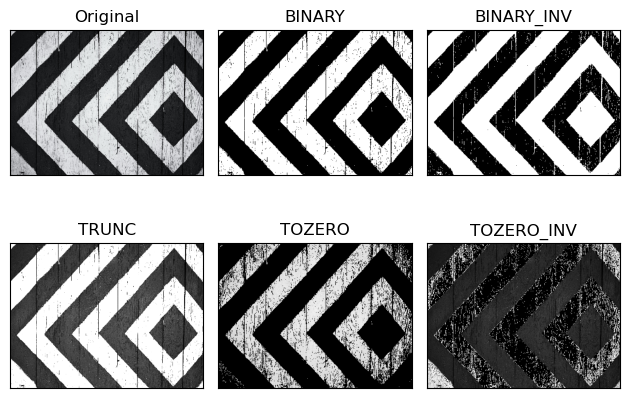

In [ ]:
# Load and resize image
img = cv2.imread("White_&_Black_Wooden_Board.jpg")
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Convert to grayscale for thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Apply different thresholding techniques
_, Th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)        # Binary thresholding
_, Th2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)    # Inverse binary
_, Th3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)         # Truncate
_, Th4 = cv2.threshold(gray, 200, 255, cv2.THRESH_TOZERO)        # To zero
_, Th5 = cv2.threshold(gray, 200, 255, cv2.THRESH_TOZERO_INV)    # Inverse to zero

# Convert original image to RGB for matplotlib (since cv2 loads in BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# List of titles and images
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_rgb, Th1, Th2, Th3, Th4, Th5]


# Plot images in a 2x3 grid
for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, index i+1
    plt.imshow(images[i], cmap='gray' if i != 0 else None)  # Grayscale for thresholded images
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide axes ticks

plt.tight_layout()  # Prevent overlap
plt.show()


## 14. Adaptive Thresholding
This cell applies adaptive thresholding techniques (mean and Gaussian) and compares them with global thresholding.

- **Adaptive Thresholding**: Unlike global thresholding, adaptive thresholding (`cv2.adaptiveThreshold`) calculates thresholds dynamically for small regions of the image. `ADAPTIVE_THRESH_MEAN_C` uses the mean of the neighborhood (11x11 block), and `ADAPTIVE_THRESH_GAUSSIAN_C` uses a weighted Gaussian mean. The constant (2) is subtracted from the computed threshold.
- **Block Size (11)**: Defines the size of the neighborhood for calculating the threshold (must be odd).
- **Constant (2)**: Adjusts the threshold value for finer control.
- **Grayscale Requirement**: Adaptive thresholding requires a single-channel (grayscale) image, hence the `cv2.cvtColor` conversion.


In [ ]:

img = cv2.imread("White_&_Black_Wooden_Board.jpg")
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Convert to grayscale (this is required for proper thresholding)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Global thresholding
_, Th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)  # Global binary thresholding

# Adaptive thresholding
Th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)  # Mean-based
Th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  # Gaussian-based

# Display results
cv2.imshow("Original Image", img)
cv2.imshow("Global Binary", Th1)
cv2.imshow("Adaptive Mean", Th2)
cv2.imshow("Adaptive Gaussian", Th3)

cv2.waitKey(0)
cv2.destroyAllWindows()


## 15. Morphological trasformations

- **Morphological Transformations**: Operations like dilation, erosion, opening, closing, morphological gradient, and top hat manipulate binary images based on shape. They use a kernel to define the neighborhood.
- **Dilation**: Expands white regions by setting pixels to the maximum value in the kernel’s neighborhood.
- **Erosion**: Shrinks white regions by setting pixels to the minimum value in the kernel’s neighborhood.
- **Opening**: Erosion followed by dilation, useful for removing noise.
- **Closing**: Dilation followed by erosion, useful for closing small holes.
- **Morphological Gradient**: Difference between dilation and erosion, highlighting edges.
- **Top Hat**: Difference between the image and its opening, isolating small bright features.
- **Kernel**: A 3x3 matrix (`np.ones((3,3), np.uint8)`) defines the shape for morphological operations.
- **Bitwise NOT**: Inverts pixel values (0 → 255, 255 → 0) to prepare the image for thresholding.
- **Thresholding**: `THRESH_BINARY_INV` sets pixels below 220 to 255 and above to 0, creating a binary mask.
- **Matplotlib Display**: Uses a 2x4 grid (`plt.subplot(2, 4, i+1)`) with grayscale colormap (`cmap='gray'`) for visualization.


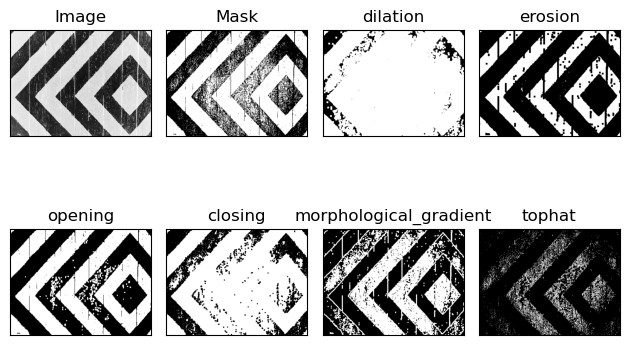

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Invert the image (reverse black and white)
img = cv2.bitwise_not(img)  # Method 1: Using bitwise_not to invert pixel values

# Apply thresholding to create a binary mask
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)  # Pixels <220 → 255, ≥220 → 0

# Define kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Morphological transformations
dilation = cv2.dilate(mask, kernel, iterations=2)  # Expands white regions
erosion = cv2.erode(mask, kernel, iterations=2)   # Shrinks white regions
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Erosion followed by dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Dilation followed by erosion
morphological_gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)  # Difference between dilation and erosion
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)  # Difference between image and its opening

# List of titles and images
titles = ['Image', 'Mask', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Morphological Gradient', 'Top Hat']
images = [img, mask, dilation, erosion, opening, closing, morphological_gradient, tophat]

# Plot images in a 2x4 grid
for i in range(8):
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns
    plt.imshow(images[i], cmap='gray')  # Grayscale display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()


This cell applies the same morphological transformations as Cell 1 but uses a different image (`Golf_Balls.jpg`). All techniques (bitwise NOT, thresholding, dilation, erosion, opening, closing, morphological gradient, top hat, kernel, and Matplotlib display) are identical.
- **Image Difference**: The input image is `Golf_Balls.jpg`, which may affect the visual output of morphological operations due to different content (e.g., circular objects vs. textured patterns).
- **Grayscale Loading**: `cv2.IMREAD_GRAYSCALE` loads the image directly in grayscale, eliminating the need for `cv2.cvtColor`.


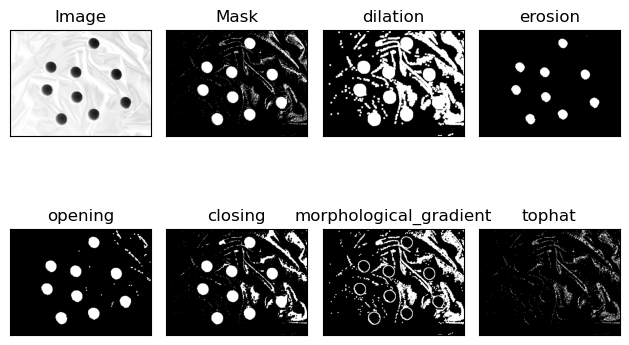

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("Golf_Balls.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Invert the image (reverse black and white)
img = cv2.bitwise_not(img)  # Method 1: Using bitwise_not to invert pixel values

# Apply thresholding to create a binary mask
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)  # Pixels <220 → 255, ≥220 → 0

# Define kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Morphological transformations
dilation = cv2.dilate(mask, kernel, iterations=2)  # Expands white regions
erosion = cv2.erode(mask, kernel, iterations=2)   # Shrinks white regions
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # Erosion followed by dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Dilation followed by erosion
morphological_gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)  # Difference between dilation and erosion
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)  # Difference between image and its opening

# List of titles and images
titles = ['Image', 'Mask', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Morphological Gradient', 'Top Hat']
images = [img, mask, dilation, erosion, opening, closing, morphological_gradient, tophat]

# Plot images in a 2x4 grid
for i in range(8):
    plt.subplot(2, 4, i+1)  # 2 rows, 4 columns
    plt.imshow(images[i], cmap='gray')  # Grayscale display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()


## 16. Blurring Techniques

- **Blurring Techniques**: Blurring reduces noise and detail in images using different methods:
  - **2D Convolution (`filter2D`)**: Applies a custom 5x5 averaging kernel (`np.ones((5,5))/25`) to smooth the image.
  - **Simple Blur (`blur`)**: Averages pixels in a 5x5 neighborhood.
  - **Gaussian Blur (`GaussianBlur`)**: Uses a Gaussian kernel to blur, with `(5,5)` kernel size and standard deviation 0.
  - **Median Blur (`medianBlur`)**: Replaces each pixel with the median of its 5x5 neighborhood, effective for salt-and-pepper noise.
  - **Bilateral Filter (`bilateralFilter`)**: Blurs while preserving edges, using diameter 9, color sigma 75, and space sigma 75.
- **BGR to RGB**: Converts the image to RGB (`cv2.COLOR_BGR2RGB`) for correct color display in Matplotlib.

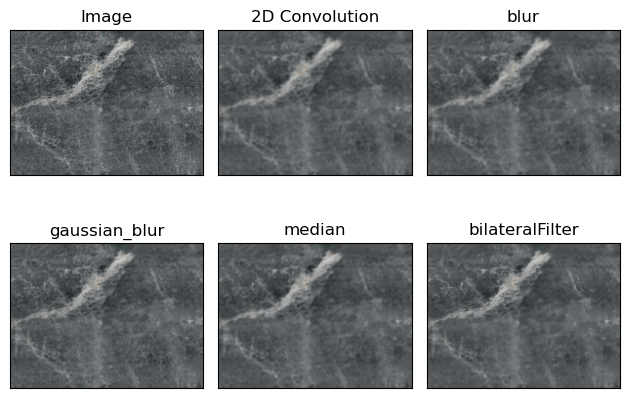

In [ ]:

# Load and resize image
img = cv2.imread("Cracks.jpg")
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Convert BGR to RGB for Matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define kernel for 2D convolution
kernel = np.ones((5, 5), np.float32) / 25  # 5x5 averaging kernel

# Apply blurring techniques
destination = cv2.filter2D(img, -1, kernel)  # 2D convolution with custom kernel
blur = cv2.blur(img, (5, 5))  # Simple averaging blur
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)  # Gaussian blur
median = cv2.medianBlur(img, 5)  # Median blur
bilateralFilter = cv2.bilateralFilter(img, 9, 75, 75)  # Bilateral filter (edge-preserving)

# List of titles and images
titles = ['Image', '2D Convolution', 'Blur', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter']
images = [img, destination, blur, gaussian_blur, median, bilateralFilter]

# Plot images in a 2x3 grid
for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns
    plt.imshow(images[i])  # No cmap for color images
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()


## 17. Image Gradients and Edge Detection 

- **Image Gradients and Edge Detection**:
  - **Laplacian (`Laplacian`)**: Computes second-order derivatives to highlight regions of rapid intensity change, using a 3x3 kernel (`ksize=3`) and `CV_64F` for floating-point precision.
  - **Sobel (`Sobel`)**: Computes first-order derivatives in X (`dx=1, dy=0`) and Y (`dx=0, dy=1`) directions to detect horizontal and vertical edges, respectively.
  - **Sobel Combined**: Uses `bitwise_or` to combine Sobel X and Y, highlighting all edges.
  - **Canny Edge Detection (`Canny`)**: A multi-step algorithm (noise reduction, gradient calculation, non-maximum suppression, double thresholding, edge tracking) using thresholds 100 and 200.
- **Type Conversion**: `CV_64F` ensures precision for gradient calculations; `np.absolute` and `np.uint8` convert results to displayable 8-bit images.
- **Bitwise OR**: Combines Sobel X and Y to show all edges in one image.
- **Grayscale Loading**: Loads the image directly in grayscale with `cv2.IMREAD_GRAYSCALE`.

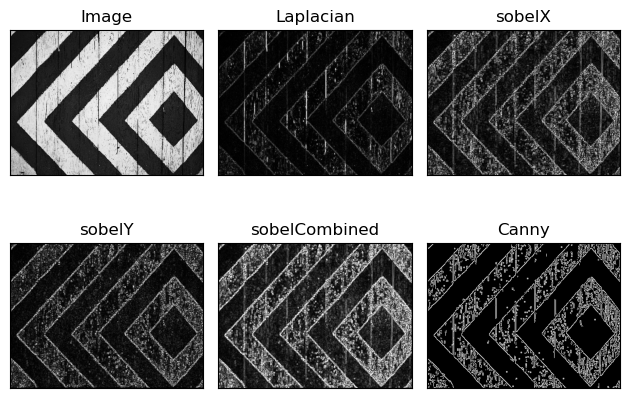

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Apply gradient and edge detection techniques
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)  # Laplacian for second-order derivatives
lap = np.uint8(np.absolute(lap))  # Convert to uint8
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)  # Sobel X (horizontal edges)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)  # Sobel Y (vertical edges)
sobelX = np.uint8(np.absolute(sobelX))  # Convert to uint8
sobelY = np.uint8(np.absolute(sobelY))  # Convert to uint8
sobelCombined = cv2.bitwise_or(sobelX, sobelY)  # Combine Sobel X and Y
edges = cv2.Canny(img, 100, 200)  # Canny edge detection

# List of titles and images
titles = ['Image', 'Laplacian', 'Sobel X', 'Sobel Y', 'Sobel Combined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]

# Plot images in a 2x3 grid
for i in range(6):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns
    plt.imshow(images[i], cmap='gray')  # Grayscale display
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks

plt.tight_layout()  # Prevent overlap
plt.show()


## Image Pyramids 

### 18. Gaussian Pyramid


Gaussian Pyramid reduces or increases image resolution by factors of 2.
  - **pyrDown**: Downscales the image by applying a Gaussian blur and subsampling (halving dimensions).
  - **pyrUp**: Upscales the image by interpolating pixels, but some detail is lost due to prior downscaling.
- **Grayscale Loading**: `cv2.IMREAD_GRAYSCALE` loads the image in single-channel grayscale, suitable for pyramid operations.


In [ ]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Create Gaussian pyramid levels
lower_resolution = cv2.pyrDown(img)  # Downscale by factor of 2
lower_resolution_2 = cv2.pyrDown(lower_resolution)  # Downscale again
higher_resolution = cv2.pyrUp(lower_resolution_2)  # Upscale back

# List of titles and images for visualization
titles = ['Original', 'Lower Resolution 1', 'Lower Resolution 2', 'Higher Resolution']
images = [img, lower_resolution, lower_resolution_2, higher_resolution]

# Display using Matplotlib for consistency
plt.figure(figsize=(12, 3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


# Optional OpenCV display (retained from original)
# cv2.imshow('Original', img)
# cv2.imshow('Lower Resolution 1', lower_resolution)
# cv2.imshow('Lower Resolution 2', lower_resolution_2)
# cv2.imshow('Higher Resolution', higher_resolution)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


### 19. Multiple Gaussian Pyramid

Multiple Gaussian Pyramid Creates a series of downscaled images (three levels) using `pyrDown`.
- **List Storage**: Stores pyramid levels in a list (`gp`) for easy access and iteration.
- **pyrDown**: Repeatedly reduces image size by half, applying Gaussian blur and subsampling each time.
- **Visualization**: Uses Matplotlib (1x4 grid) for consistent display, with `cmap='gray'` for grayscale images. Retains original OpenCV `imshow` display with indexed window names.
- **Grayscale Loading**: Loads image in grayscale to ensure compatibility with pyramid operations.
- **Error Handling**: Verifies image loading with `if img is None`.



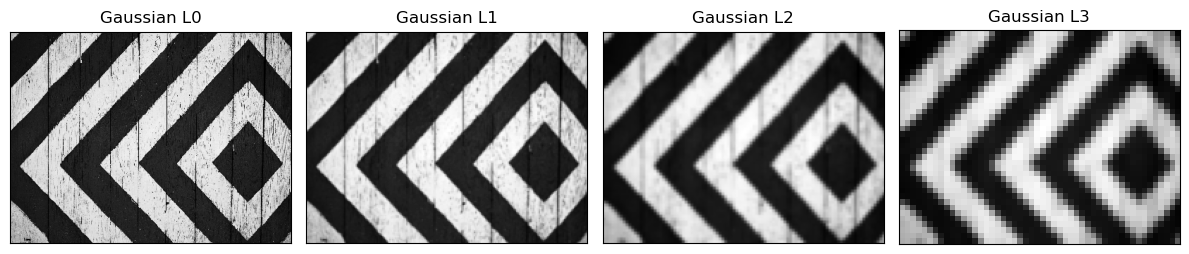

In [ ]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Create Gaussian pyramid
layer = img.copy()
gp = [layer]  # List to store pyramid levels
for i in range(3):
    layer = cv2.pyrDown(layer)  # Downscale by factor of 2
    gp.append(layer)

# Display using Matplotlib
plt.figure(figsize=(12, 3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(gp[i], cmap='gray')
    plt.title(f'Gaussian L{i}')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Optional OpenCV display (retained from original)
cv2.imshow('Original', img)
for i in range(3):
    cv2.imshow(f'Gaussian L{i+1}', gp[i+1])
cv2.waitKey(0)
cv2.destroyAllWindows()

- **Laplacian Pyramid**: Represents the difference between each Gaussian level and the upscaled version of the next level.
  - **pyrUp**: Upscales a lower-resolution image.
  - **cv2.resize**: Ensures the upscaled image matches the size of the previous Gaussian level.
  - **cv2.subtract**: Computes the Laplacian by subtracting the upscaled image from the corresponding Gaussian level.
- **List Storage**: `gp` stores Gaussian levels; `lp` stores Laplacian levels, starting with the smallest Gaussian image.
- **Visualization**: Uses a 2x4 Matplotlib grid to display Gaussian (top row) and Laplacian (bottom row) pyramids, with `cmap='gray'` for grayscale.
- **Grayscale Loading**: Ensures compatibility with pyramid operations.

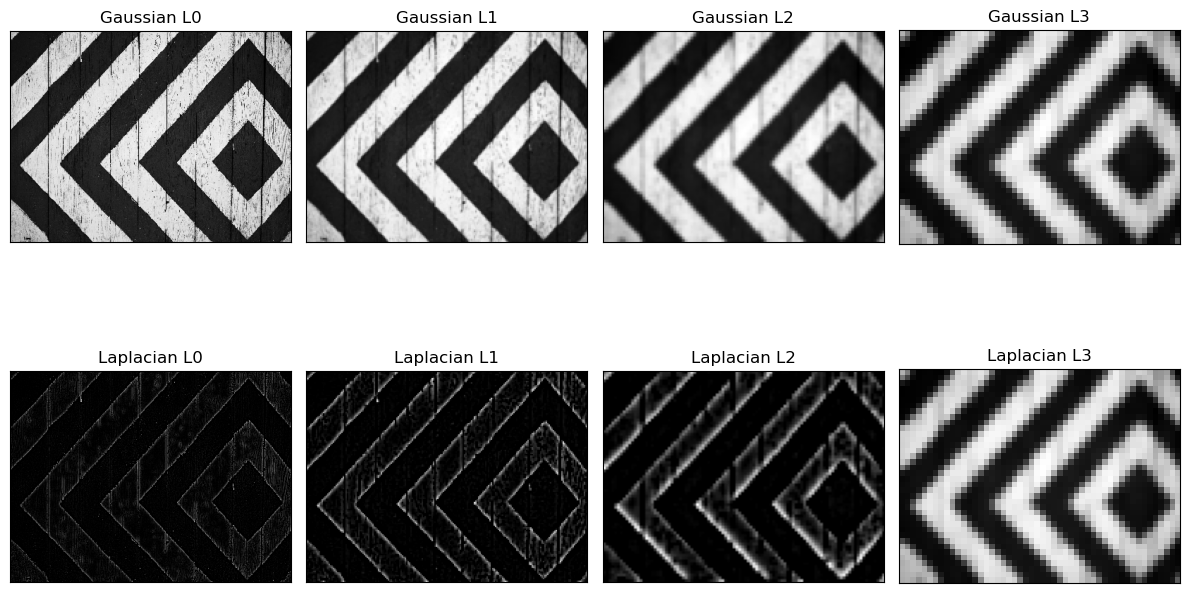

In [6]:

# Load and resize image in grayscale
img = cv2.imread("White_&_Black_Wooden_Board.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")
img = cv2.resize(img, (400, 300))

# Create Gaussian pyramid
layer = img.copy()
gp = [layer]  # List to store Gaussian pyramid levels
for i in range(3):
    layer = cv2.pyrDown(layer)
    gp.append(layer)

# Create Laplacian pyramid
lp = [gp[3]]  # Start with the top level (smallest image)
for i in range(3, 0, -1):
    # Upscale the current Gaussian pyramid level
    gaussian_extended = cv2.pyrUp(gp[i])
    # Resize to match the size of the previous level
    gaussian_extended = cv2.resize(gaussian_extended, (gp[i-1].shape[1], gp[i-1].shape[0]))
    # Compute Laplacian by subtracting upscaled image from the previous level
    laplacian = cv2.subtract(gp[i-1], gaussian_extended)
    lp.append(laplacian)

# Visualize Gaussian and Laplacian pyramids
plt.figure(figsize=(12, 8))
# Gaussian pyramid
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(gp[i], cmap='gray')
    plt.title(f'Gaussian L{i}')
    plt.xticks([]), plt.yticks([])

# Laplacian pyramid
for i in range(4):
    plt.subplot(2, 4, i+5)
    plt.imshow(lp[3-i], cmap='gray')  # Reverse order for display
    plt.title(f'Laplacian L{i}')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


## 20. Image Blending Using Pyramids

This code blends two images smoothly using the image pyramid technique. It combines the left half of one image with the right half of another by following these steps:

1. **Load Images**: Load two color images and resize them to the same dimensions.
2. **Gaussian Pyramids**: Create multi-level Gaussian pyramids for both images by repeatedly reducing their resolution.
3. **Laplacian Pyramids**: Generate Laplacian pyramids from the Gaussian pyramids to capture image details at each level.
4. **Blend Pyramids**: Combine the left half of one image's Laplacian pyramid with the right half of the other's at each level.
5. **Reconstruct Image**: Rebuild the final blended image from the combined pyramids and display it alongside a direct blend for comparison.

The result is a seamless blend with smoother transitions compared to a direct combination of image halves.

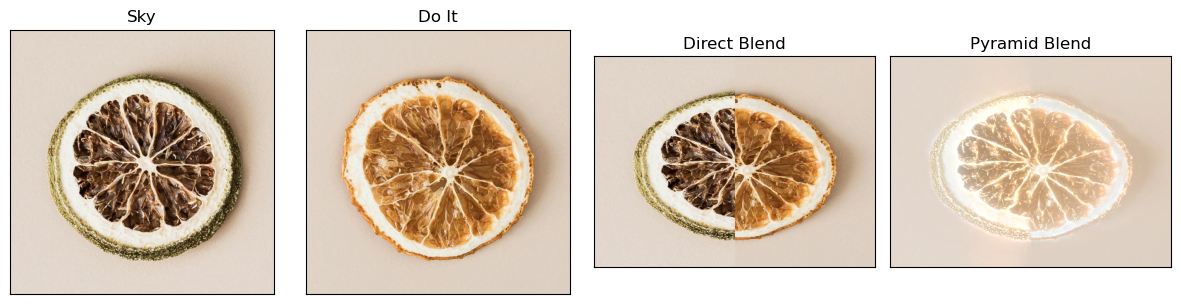

In [ ]:
# Load and resize images in color
sky = cv2.imread("orange1.jpg")
do_it = cv2.imread("orange2.jpg")
if sky is None or do_it is None:
    raise ValueError("One or both images not loaded. Check the file paths.")

img1 = cv2.resize(sky, (400, 300))
img2 = cv2.resize(do_it, (400, 300))

# Create direct blend for reference
stacked_image = np.hstack((img1[:, :200], img2[:, 200:]))

# Generate Gaussian pyramid for image 1
img1_copy = img1.copy()
gp_img1 = [img1_copy]
for i in range(6):
    img1_copy = cv2.pyrDown(img1_copy)
    gp_img1.append(img1_copy)

# Generate Gaussian pyramid for image 2
img2_copy = img2.copy()
gp_img2 = [img2_copy]
for i in range(6):
    img2_copy = cv2.pyrDown(img2_copy)
    gp_img2.append(img2_copy)

# Generate Laplacian pyramid for image 1
img1_copy = gp_img1[6]  # Start with the top level
lp_img1 = [img1_copy]
for i in range(6, 0, -1):
    gaussian_extended = cv2.pyrUp(gp_img1[i])
    # Resize to match the size of the previous level
    gaussian_extended = cv2.resize(gaussian_extended, (gp_img1[i-1].shape[1], gp_img1[i-1].shape[0]))
    laplacian = cv2.subtract(gp_img1[i-1], gaussian_extended)
    lp_img1.append(laplacian)

# Generate Laplacian pyramid for image 2
img2_copy = gp_img2[6]
lp_img2 = [img2_copy]
for i in range(6, 0, -1):
    gaussian_extended = cv2.pyrUp(gp_img2[i])
    # Resize to match the size of the previous level
    gaussian_extended = cv2.resize(gaussian_extended, (gp_img2[i-1].shape[1], gp_img2[i-1].shape[0]))
    laplacian = cv2.subtract(gp_img2[i-1], gaussian_extended)
    lp_img2.append(laplacian)

# Blend left and right halves of Laplacian pyramids
img1_img2_pyramids = []
for img1_lap, img2_lap in zip(lp_img1, lp_img2):
    cols = img1_lap.shape[1]  # Get width (cols)
    laplacian = np.hstack((img1_lap[:, :cols//2], img2_lap[:, cols//2:]))
    img1_img2_pyramids.append(laplacian)

# Reconstruct the blended image
img1_img2_reconstruct = img1_img2_pyramids[0]
for i in range(1, 7):
    img1_img2_reconstruct = cv2.pyrUp(img1_img2_reconstruct)
    # Resize to match the size of the next pyramid level
    img1_img2_reconstruct = cv2.resize(img1_img2_reconstruct, (img1_img2_pyramids[i].shape[1], img1_img2_pyramids[i].shape[0]))
    img1_img2_reconstruct = cv2.add(img1_img2_pyramids[i], img1_img2_reconstruct)

# Convert BGR to RGB for Matplotlib
sky_rgb = cv2.cvtColor(sky, cv2.COLOR_BGR2RGB)
do_it_rgb = cv2.cvtColor(do_it, cv2.COLOR_BGR2RGB)
stacked_image_rgb = cv2.cvtColor(stacked_image, cv2.COLOR_BGR2RGB)
reconstruct_rgb = cv2.cvtColor(img1_img2_reconstruct, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.imshow(sky_rgb)
plt.title('Sky')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 2)
plt.imshow(do_it_rgb)
plt.title('Do It')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(stacked_image_rgb)
plt.title('Direct Blend')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(reconstruct_rgb)
plt.title('Pyramid Blend')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Optional OpenCV display (retained from original)
cv2.imshow('stacked_image', stacked_image)
cv2.imshow('img1_img2_reconstruct', img1_img2_reconstruct)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 21. Find and Draw Contours

### Drawing All Contours with Different Colors

This code loads an image, detects contours (shapes), and draws each contour with a unique color to visualize them.

- **Find Contours**: Applies a binary threshold to the grayscale image and uses `cv2.findContours` to detect shapes (contours).
- **Draw Contours**: Loops through all contours, assigning a different color (blue, green, red, etc.) to each from a predefined list. Draws each contour with a thickness of 3 and labels it with its index (e.g., `C0`, `C1`) at the contour’s starting point.


In [ ]:
# Load image
img = cv2.imread('Do_It.jpg')
if img is None:
    print("Error: Could not load image 'Do_It.jpg'")
    exit()

# Resize image to 400x300
img = cv2.resize(img, (400, 300))

# Convert to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Check contours
print("Number of contours: " + str(len(contours)))
if len(contours) == 0:
    print("No contours found")
    exit()

# Print first contour for debugging
print(contours[0])

# Define a list of colors (BGR format)
colors = [
    (255, 0, 0),    # Blue
    (0, 255, 0),    # Green
    (0, 0, 255),    # Red
    (255, 255, 0),  # Cyan
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Yellow
]

# Draw each contour with a different color
for i, contour in enumerate(contours):
    # Use modulo to cycle through colors if there are more contours than colors
    color = colors[i % len(colors)]
    cv2.drawContours(img, [contour], contourIdx=-1, color=color, thickness=3)
    # Optionally, display contour index near the contour
    # Find a point on the contour to place the text
    if len(contour) > 0:
        x, y = contour[0][0]  # First point of the contour
        cv2.putText(img, f'C{i}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Display images
cv2.imshow("Image", img)
cv2.imshow('Image Gray', imgray)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours: 15
[[[0 0]]

 [[0 1]]

 [[0 2]]

 ...

 [[3 0]]

 [[2 0]]

 [[1 0]]]


### Drawing Specific Contours with Labels

This code loads an image, filters contours by size, and draws all contours plus two specific contours (indices 1 and 2) with distinct colors and labels.

- **Find and Filter Contours**: Applies a threshold and detects contours, then filters out small contours (area < 100 pixels) to focus on significant shapes.
- **Draw Contours**: Draws all contours in teal (thickness 2), contour index 2 in red (thickness 1), and contour index 1 in yellow (thickness 1). Labels each with text (`All Contours`, `C1`, `C2`) at appropriate positions, using centroids for specific contours.


In [5]:

# Load image
img = cv2.imread('Do_It.jpg')
if img is None:
    print("Error: Could not load image 'Do_It.jpg'")
    exit()

# Resize image to 400x300
img = cv2.resize(img, (600, 500))

# Convert to grayscale
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Check contours
print("Number of contours: " + str(len(contours)))
if len(contours) == 0:
    print("No contours found")
    exit()

# Filter small contours (optional, adjust min_area as needed)
min_area = 100  # Minimum contour area
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
print("Number of contours after filtering: " + str(len(contours)))

# Validate contour indices
if len(contours) < 3:
    print("Error: Not enough contours to display indices 1 and 2")
    exit()

# Define high-contrast color palette (BGR format)
colors = [
    (0, 128, 128),  # Teal for all contours (-1)
    (0, 0, 255),    # Red for contour index 2
    (0, 255, 255),  # Yellow for contour index 1
]

# Create a copy of the image for drawing
img_contours = img.copy()

# Draw all contours (index -1) with thickness 3
cv2.drawContours(img_contours, contours, -1, colors[0], thickness=2)
# Add label for all contours (place at image center for simplicity)
cv2.putText(img_contours, 'All Contours', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

# Draw contour index 2 with thickness 2
cv2.drawContours(img_contours, [contours[2]], -1, colors[1], thickness=1)
# Add label at centroid for contour 2
M = cv2.moments(contours[2])
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
else:
    cx, cy = contours[2][0][0]
text = 'C2'
(text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
cv2.rectangle(img_contours, (cx, cy - text_h - 5), (cx + text_w, cy + 5), (0, 0, 0), -1)
cv2.putText(img_contours, text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

# Draw contour index 1 with thickness 1
cv2.drawContours(img_contours, [contours[1]], -1, colors[2], thickness=1)
# Add label at centroid for contour 1
M = cv2.moments(contours[1])
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
else:
    cx, cy = contours[1][0][0]
text = 'C1'
(text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
cv2.rectangle(img_contours, (cx, cy - text_h - 5), (cx + text_w, cy + 5), (0, 0, 0), -1)
cv2.putText(img_contours, text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

# Display images
cv2.imshow("Image with Contours", img_contours)
cv2.imshow('Image Gray', imgray)

cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours: 15
Number of contours after filtering: 13



## 22. Motion Detection

The code below uses OpenCV to detect motion in a video (`People_Walking.mp4`) by analyzing differences between consecutive frames. Here's a simple breakdown:

- **Purpose**: Detects moving objects (e.g., people walking) in a video and draws yellow rectangles around them.
- **How It Works**:
  1. Loads the video and resizes frames to 800x600 for consistent processing.
  2. Computes the absolute difference between two consecutive frames to identify changes.
  3. Converts the difference to grayscale, applies Gaussian blur to reduce noise, and thresholds it to highlight significant changes.
  4. Dilates the thresholded image to connect nearby regions and finds contours.
  5. Draws rectangles around contours with an area greater than 800 pixels (filtering out small noise).
  6. Adds a "Status: Movement" text label in blue on each frame.
  7. Displays the processed frame and updates frames in a loop until the video ends or the 'Esc' key is pressed.
- **Key Features**:
  - Motion detection using frame differencing.
  - Contour-based rectangle drawing for moving objects.
  - Real-time display with a 40ms delay per frame (approximately 25 FPS).

This code is useful for basic motion detection applications, such as surveillance or activity monitoring, and can be extended with additional processing (e.g., tracking specific objects).

In [ ]:
# Open the input video file
cap = cv2.VideoCapture('People_Walking.mp4')
if not cap.isOpened():
    print("Error: Could not open video 'People_Walking.mp4'")
    exit()

# Read and resize the first two frames to 800x600
ret, frame1 = cap.read()
if ret:
    frame1 = cv2.resize(frame1, (800, 600))
else:
    print("Error: Could not read first frame")
    cap.release()
    exit()

ret, frame2 = cap.read()
if ret:
    frame2 = cv2.resize(frame2, (800, 600))
else:
    print("Error: Could not read second frame")
    cap.release()
    exit()

while cap.isOpened():
    # Compute absolute difference between consecutive frames
    diff = cv2.absdiff(frame1, frame2)
    
    # Convert difference to grayscale
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
    
    # Apply binary thresholding to highlight changes
    _, thresh = cv2.threshold(blur, thresh=20, maxval=255, type=cv2.THRESH_BINARY)
    
    # Define a 3x3 kernel for dilation
    kernel = np.ones((3, 3), np.uint8)
    
    # Dilate to connect nearby regions
    dilated = cv2.dilate(thresh, kernel, iterations=3)
    
    # Find contours in the dilated image
    contours, _ = cv2.findContours(dilated, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw rectangles around contours with area > 800 pixels
    for contour in contours:
        if cv2.contourArea(contour) < 800:
            continue
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame1, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 0), thickness=2)
    
    # Add status text to indicate movement detection
    cv2.putText(
        frame1,
        text='Status: Movement',
        org=(10, 40),
        fontFace=cv2.FONT_HERSHEY_COMPLEX,
        fontScale=1,
        color=(255, 0, 0),
        thickness=2
    )
    
    # Display the processed frame
    cv2.imshow('Motion Detection', frame1)
    
    # Resize display window to match frame size
    cv2.resizeWindow('Motion Detection', 800, 600)
    
    # Update frames for the next iteration
    frame1 = frame2
    ret, frame2 = cap.read()
    if ret:
        frame2 = cv2.resize(frame2, (800, 600))
    else:
        print("End of video or error reading frame")
        break
    
    # Exit loop if 'Esc' key (27) is pressed
    if cv2.waitKey(40) & 0xFF == 27:
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()

End of video or error reading frame


## 23. Detect Simple Geomentic Shapes

In the following cell we use OpenCV to detect and label basic geometric shapes. (e.g., triangles, squares, circles) in an image (`shapes.png`). Here's a concise overview:

- **Purpose**: Identifies geometric shapes in an image and labels them with their names (e.g., "Triangle", "Square").
- **How It Works**:
  1. Loads and resizes the image to 600x400 pixels for consistent processing.
  2. Converts the image to grayscale and applies binary thresholding to highlight shapes.
  3. Finds contours in the thresholded image and approximates their shapes.
  4. Determines the shape based on the number of vertices:
     - 3: Triangle
     - 4: Square (if aspect ratio is ~1) or Rectangle
     - 5: Pentagon
     - 6: Hexagon
     - 8: Octagon
     - 10: Star
     - Other: Circle
  5. Draws contours and labels each shape with black text above it.
  6. Displays the annotated image until a key is pressed.
- **Key Features**:
  - Shape detection using contour approximation.
  - Differentiates squares from rectangles based on aspect ratio.
  - Simple text labels for visual identification.
- **Output**: A window showing the image with black contours and shape names (e.g., "Hexagon") near each shape.

This code is ideal for educational purposes or simple shape recognition tasks, assuming the image has clear, distinct shapes with high contrast.

In [2]:
# Load image
img = cv2.imread('shapes.png')
if img is None:
    print("Error: Could not load image 'shapes.png'")
    exit()

# Resize image to 800x600 (consistent with your previous request)
img = cv2.resize(img, (600, 400))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(src=gray, thresh=240, maxval=255, type=cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

for contour in contours:
    # Approximate the contour
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.01*cv2.arcLength(contour, True), closed=True)
    # Draw the approximated contour
    cv2.drawContours(image=img, contours=[approx], contourIdx=-1, color=(0, 0, 0), thickness=2)
    
    # Get coordinates for text (use first point of the approximated contour)
    if len(approx) > 0:
        x = approx.ravel()[0]
        y = approx.ravel()[1] - 10
    else:
        continue  # Skip empty contours

    # Identify and label shapes
    if len(approx) == 3:
        cv2.putText(img=img, text="Triangle", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)
    elif len(approx) == 4:
        x1, y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w) / h
        print(f"Aspect Ratio: {aspectRatio}")
        if 0.95 <= aspectRatio <= 1.05:
            cv2.putText(img=img, text="Square", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                        fontScale=0.5, color=(0, 0, 0), thickness=1)
        else:
            cv2.putText(img=img, text="Rectangle", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                        fontScale=0.5, color=(0, 0, 0), thickness=1)
    elif len(approx) == 5:
        cv2.putText(img=img, text="Pentagon", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)
    elif len(approx) == 6:
        cv2.putText(img=img, text="Hexagon", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)
    elif len(approx) == 8:
        cv2.putText(img=img, text="Octagon", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)
    elif len(approx) == 10:
        cv2.putText(img=img, text="Star", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)
    else:
        cv2.putText(img=img, text="Circle", org=(x, y), fontFace=cv2.FONT_HERSHEY_COMPLEX, 
                    fontScale=0.5, color=(0, 0, 0), thickness=1)

# Display the image
cv2.imshow('Shapes', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Aspect Ratio: 1.5
Aspect Ratio: 1.6233766233766234
Aspect Ratio: 1.0222222222222221


## 24. Image Histograms

In the following cells we use OpenCV and Matplotlib to demonstrate image histograms, which show the distribution of pixel intensities in an image. It includes four sections, each processing an image and visualizing its histogram in different ways.

- **Section 1: Grayscale Image Histogram**:
  - Creates a 200x200 grayscale image with two rectangles (one at intensity 255, another at 127).
  - Displays the image and plots its histogram, showing pixel intensity frequencies.

- **Section 2: RGB Image Histogram**:
  - Loads a color image (`orange2.jpg`), splits it into blue (B), green (G), and red (R) channels.
  - Displays the full image and each channel separately.
  - Plots histograms for B, G, and R channels in different colors, showing their intensity distributions.

- **Section 3: Grayscale Image Histogram (External Image)**:
  - Loads `orange2.jpg` as a grayscale image and resizes it to 400x300.
  - Displays the image and plots its histogram to show the distribution of grayscale intensities.

- **Section 4: Blue Channel Histogram with `calcHist`**:
  - Loads `orange2.jpg`, splits it into B, G, R channels.
  - Displays the image and each channel.
  - Uses `cv2.calcHist` to compute and plot the histogram of the blue channel.

**Purpose**: The code illustrates how to analyze pixel intensity distributions in grayscale and color images using histograms, useful for understanding image content or preprocessing for tasks like thresholding.

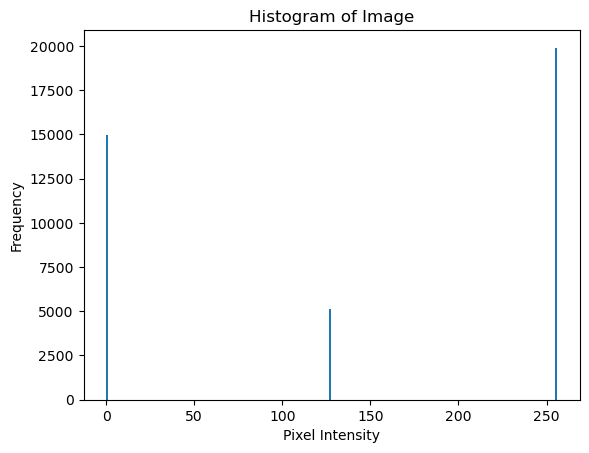

In [ ]:
# Create a 200x200 grayscale image
img = np.zeros((200, 200), np.uint8)
cv2.rectangle(img, pt1=(0, 100), pt2=(200, 200), color=255, thickness=-1)
cv2.rectangle(img, pt1=(0, 50), pt2=(100, 100), color=127, thickness=-1)

# Display the image
cv2.imshow('Image', img)

# Plot histogram
plt.hist(img.ravel(), bins=255, range=(0, 256))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()

# Wait for keypress and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

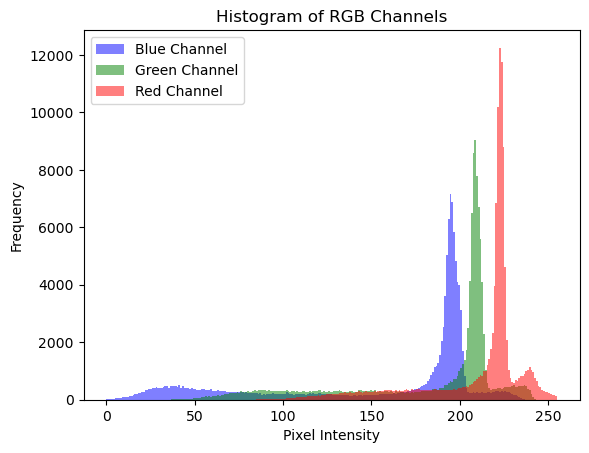

In [ ]:
# Load and resize image
img = cv2.imread('orange2.jpg')
if img is None:
    print("Error: Could not load image 'orange2.jpg'")
    exit()
img = cv2.resize(img, (400, 300))

# Split into B, G, R channels
b, g, r = cv2.split(img)

# Display images
cv2.imshow("Image", img)
cv2.imshow("Blue Channel", b)
cv2.imshow("Green Channel", g)
cv2.imshow("Red Channel", r)
cv2.resizeWindow("Image", 400, 300)
cv2.resizeWindow("Blue Channel", 400, 300)
cv2.resizeWindow("Green Channel", 400, 300)
cv2.resizeWindow("Red Channel", 400, 300)

# Plot histograms for B, G, R channels
plt.hist(b.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.5, label='Blue Channel')
plt.hist(g.ravel(), bins=256, range=(0, 255), color='green', alpha=0.5, label='Green Channel')
plt.hist(r.ravel(), bins=256, range=(0, 255), color='red', alpha=0.5, label='Red Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of RGB Channels')
plt.legend()
plt.show()

# Wait for keypress and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

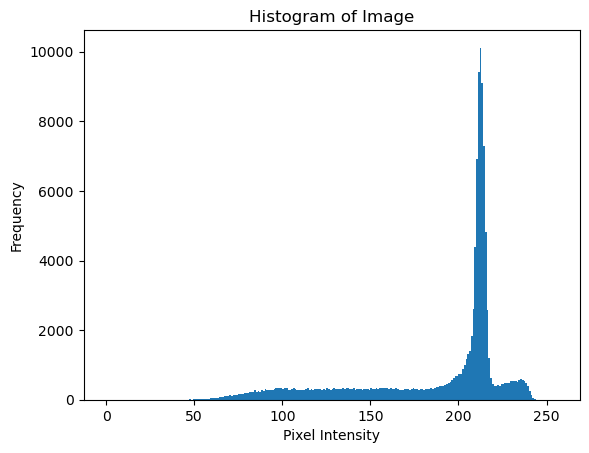

In [ ]:
img = cv2.imread('orange2.jpg', 0)

img = cv2.resize(img, (400, 300))

# Plot histogram
plt.hist(img.ravel(), bins=256, range=(0, 256))

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()

# Wait for keypress and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

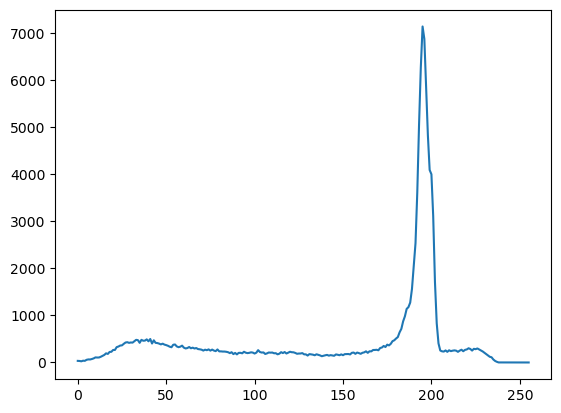

In [ ]:
img = cv2.imread('orange2.jpg')
img = cv2.resize(img, (400, 300))

b, g, r = cv2.split(img)

cv2.imshow("img", img)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)

hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 25. Template Matching

In the cell below, we use OpenCV to perform template matching, locating a smaller template image (`Do.jpg`) within a larger image (`Do_It.jpg`). Here's a simple overview:

- **Purpose**: Finds and highlights occurrences of a template image within a larger image.
- **How It Works**:
  1. Loads the main image and template (template in grayscale).
  2. Resizes both images to scale the main image’s width to 1000 pixels, maintaining aspect ratio.
  3. Converts the main image to grayscale for matching.
  4. Uses `cv2.matchTemplate` with normalized correlation (`TM_CCORR_NORMED`) to find template matches.
  5. Applies a threshold (0.999) to identify strong matches.
  6. Draws red rectangles around matched locations.
  7. Displays the result until a key is pressed.
- **Key Features**:
  - Template matching to locate specific patterns.
  - High threshold for precise matches.
  - Visual output with red rectangles highlighting matches.
- **Output**: A window showing the main image with red rectangles around areas where the template is found.

This code is useful for tasks like object detection or pattern recognition in images.


In [ ]:
# Load the main image and template
img = cv2.imread('Do_It.jpg')
template = cv2.imread('Do.jpg', 0)  # Load template in grayscale

# Check if images loaded successfully
if img is None or template is None:
    print("Error: Could not load image or template")
    exit()

# Define scale factor to resize main image width to 1000 pixels
scale = 1000 / img.shape[1]

# Resize both image and template using the same scale
img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Convert main image to grayscale for template matching
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get template dimensions (width, height)
w, h = template.shape[::-1]

# Perform template matching using normalized correlation coefficient
res = cv2.matchTemplate(gray_img, template, method=cv2.TM_CCORR_NORMED)

# Set threshold for matching
threshold = 0.999
loc = np.where(res >= threshold)  # Find locations where match exceeds threshold

# Draw rectangles around matched locations
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), color=(0, 0, 255), thickness=2)

# Display the result
cv2.imshow('Template Matching Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Hough Line Transform

The Hough Transform is a popular technique to detect shapes, like lines, that can be mathematically defined, even if they are slightly broken or distorted. In image processing, a line can be represented in two ways: in Cartesian coordinates as `y = mx + c` (defining a point in slope-intercept space) or in polar coordinates as `x*cos(theta) + y*sin(theta) = r` (used by OpenCV’s Hough Transform for better handling of vertical lines).

**Hough Transform Algorithm**:
1. **Edge Detection**: Uses Canny edge detection to find edges in the image.
2. **Hough Space Mapping**: Maps edge points to Hough space and stores votes in an accumulator.
3. **Line Identification**: Interprets the accumulator to detect lines of infinite length using a threshold.
4. **Line Conversion**: Converts infinite lines to finite segments (in Probabilistic Hough Transform).

OpenCV implements two types of Hough Line Transforms:
- **Standard Hough Transform (`cv2.HoughLines`)**: Detects infinite lines using polar coordinates.
  - **Parameters**:
    - `rho=1`: Distance resolution in pixels (1 pixel).
    - `theta=np.pi/180`: Angle resolution in radians (1 degree).
    - `threshold=180`: Minimum votes to consider a line valid.
- **Probabilistic Hough Transform (`cv2.HoughLinesP`)**: Detects finite line segments, ideal for broken lines.
  - **Parameters** (in addition to `rho`, `theta`, `threshold`):
    - `minLineLength=100`: Minimum length of a line segment (pixels).
    - `maxLineGap=10`: Maximum gap between segments to connect them (pixels).

**Code Purpose**:
- **Standard Hough Transform**: Identifies and draws infinite red lines on an image, using Canny edge detection and `cv2.HoughLines`. Displays edges and the result with lines.
- **Probabilistic Hough Transform**: Detects and draws finite red line segments on the same image, using `cv2.HoughLinesP`, focusing on significant line segments.

**Output**: Windows showing the Canny edges and the image with red lines (infinite for Standard, segments for Probabilistic) over detected linear features, such as window edges.

This combined approach is useful for detecting linear structures in images, with the Standard method suited for continuous lines and the Probabilistic method for broken or partial lines.

## 26. The Standard Hough Line Transform

- **Purpose**: Identifies and draws infinite lines in an image, useful for detecting linear structures like window edges.
- **How It Works**:
  1. Loads and resizes the image to 300x400 pixels.
  2. Converts to grayscale and applies Canny edge detection to find edges.
  3. Uses `cv2.HoughLines` with parameters:
     - `rho=1`: Distance resolution (1 pixel).
     - `theta=np.pi/180`: Angle resolution (1 degree).
     - `threshold=180`: Minimum votes to detect a line.
  4. Converts detected lines (in polar coordinates: rho, theta) to Cartesian coordinates and draws red lines.
  5. Displays the edge image and the result with lines.
- **Output**: A window showing the image with red lines drawn over detected linear features.



In [ ]:
# Load and resize image to 300x400
img = cv2.imread('Triangular_windows.jpg')
if img is None:
    print("Error: Could not load image 'Triangular_windows.jpg'")
    exit()
img = cv2.resize(img, (300, 400))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

# Display Canny edges
cv2.imshow('Canny Edges', edges)

# Apply Standard Hough Line Transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=180)

# Draw detected lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]  # Extract rho and theta
        a = np.cos(theta)
        b = np.sin(theta)
        
        # Calculate starting point (x0, y0) in image
        x0 = a * rho
        y0 = b * rho
        
        # Compute line endpoints for drawing (extend 1000 pixels)
        x1 = int(x0 + 1000 * (-b))  # x1 = r * cos(theta) - 1000 * sin(theta)
        y1 = int(y0 + 1000 * (a))   # y1 = r * sin(theta) + 1000 * cos(theta)
        x2 = int(x0 - 1000 * (-b))  # x2 = r * cos(theta) + 1000 * sin(theta)
        y2 = int(y0 - 1000 * (a))   # y2 = r * sin(theta) - 1000 * cos(theta)
        
        # Draw red line on image
        cv2.line(img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 0, 255), thickness=2)

# Display the result
cv2.imshow('Hough Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 27. The Probabilistic Hough Line Transform

- **Purpose**: Identifies and draws finite line segments, ideal for detecting broken or partial lines in images.
- **How It Works**:
  1. Loads and resizes the image to 300x400 pixels.
  2. Converts to grayscale and applies Canny edge detection to find edges.
  3. Uses `cv2.HoughLinesP` with parameters:
     - `rho=1`: Distance resolution (1 pixel).
     - `theta=np.pi/180`: Angle resolution (1 degree).
     - `threshold=170`: Minimum votes to detect a line.
     - `minLineLength=100`: Minimum length of a line segment (pixels).
     - `maxLineGap=10`: Maximum gap between segments to connect them (pixels).
  4. Draws red line segments using provided endpoints.
  5. Displays the edge image and the result with line segments.
- **Output**: A window showing the image with red line segments drawn over detected linear features.


In [3]:
# Load and resize image to 300x400
img = cv2.imread('Triangular_windows.jpg')
if img is None:
    print("Error: Could not load image 'Triangular_windows.jpg'")
    exit()
img = cv2.resize(img, (300, 400))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

# Display Canny edges
cv2.imshow('Canny Edges', edges)

# Apply Probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=170, 
                        minLineLength=100, maxLineGap=10)

# Draw detected line segments on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]  # Extract line endpoints
        # Draw red line segment on image
        cv2.line(img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 0, 255), thickness=2)

# Display the result
cv2.imshow('Probabilistic Hough Lines', img)
cv2.waitKey(0)
cv2.destroyAllWindows()